In [4]:
import numpy as np
import pandas as pd
import sys 
path = '..'
sys.path.append(path) 
from logger import Logger
import matplotlib.pyplot as plt
import gui as GUI

In [3]:
log = Logger()
log.enable_logger()

In [5]:
def string2list_Quad(temp):
    temp_result = []
    for i in range(len(temp)):
        # Quadcopter
        temp_value = temp[i].replace('\r\n','').replace('[', '').replace(']', '').split(' ')
        temp_value = [float(x) for x in temp_value if x != '']
        #print(temp_value)
        temp_result.append(temp_value)
        #print(temp_result)
    return np.array(temp_result)

In [6]:
def cost_computing(task, state):
    if task == 1:
        Weight_Matrix_t = np.diag([50,50,80,10,10,10,5,5,5,1,1,1])
        GOAL = np.array([1.5,1.5,4.0, 0,0,0,0,0,0,0,0,0])
        cost = (0.5 * (state - GOAL).dot(Weight_Matrix_t).dot(state - GOAL))
    return cost

In [7]:
def result_process(log, len_seq, flag_combine):
    len_seq_all = []
    state_sequence_all = []#np.array([])
    cost_sequence_all = []#np.array([])
    for j in log.df.Epoch.unique():
        state_seq = log.df[(log.df['Phase'] == 'Update') & (log.df['Parameter'] == 'State_Init') & (log.df['Epoch'] == j)].reset_index(drop=True)['Value']
        if flag_combine:
            sequence = string2list_Quad(state_seq)[:len_seq]
        else:
            sequence = string2list_Quad(state_seq)#[:len_seq]
        cost_sequence = np.array([])
        for i in range(len(sequence)):
            state = sequence[i]
            cost = cost_computing(1, state)
            cost_sequence = np.append(cost_sequence, cost)
        len_seq_all.append(len(state_seq))
        cost_sequence_all.append(np.array(cost_sequence))
        state_sequence_all.append(np.array(sequence))
    print(len_seq_all)
    return np.array(state_sequence_all), np.array(cost_sequence_all)

In [13]:
if False:
    labels = ['30', '50', '80']
    filename = ['Logger_Quadcopter_CrossRing_20200316155006',
               'Logger_Quadcopter_CrossRing_20200316155033',
               'Logger_Quadcopter_CrossRing_20200316155051']
if True:
    labels = ['30 [0.5,10]', '30 [0.5,10]', '50 [0.5,10]'
              , '50 [0.5,5]', '80 [0.5,10]', '30 [3,30]']
    filename = ['Logger_Quadcopter_CrossRing_20200315222129',
               'Logger_Quadcopter_CrossRing_20200315224946',
               'Logger_Quadcopter_CrossRing_20200316032730',
               'Logger_Quadcopter_CrossRing_20200316034727',
               'Logger_Quadcopter_CrossRing_20200316034814',
               'Logger_Quadcopter_CrossRing_20200316073053']

In [14]:
log = [ Logger() for _ in range(len(filename))]
for i in range(len(filename)):
    log[i].enable_logger()
    log[i].file_read(filename[i] + '.csv')

In [29]:
i = 5
len_seq = 99
state_sequence_all, cost_sequence_all = result_process(log[i], len_seq, True)
cost_sequence_all.shape

[109, 299, 299, 299, 299, 299]


(6, 99)

151
3
0
[100, 99, 99, 99, 99, 99, 99, 99, 99, 99]
1
[100, 99, 99, 99, 99, 99, 99]
2
[100, 99, 99, 99, 99]


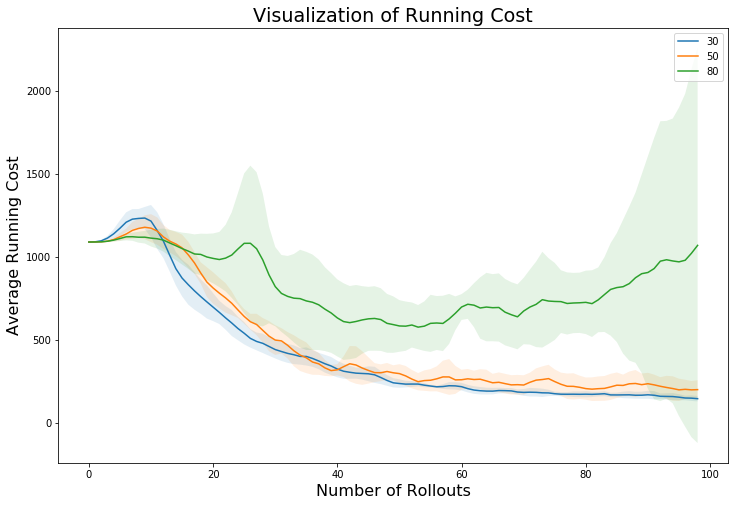

In [12]:
plt.figure(figsize = (12,8))
font_size = 16
len_seq = 99
print(len(filename))
for i in range(len(filename)):
    print(i)
    state_sequence_all, cost_sequence_all = result_process(log[i], len_seq, True)
    temp_mean = np.mean(cost_sequence_all, axis=0)
    temp_error = np.std(cost_sequence_all, axis=0)
    #plt.errorbar(range(min_len), temp_mean , yerr=temp_error, errorevery=3, label = i)
    plt.plot(range(len_seq), temp_mean, label = labels[i])
    plt.fill_between(range(len_seq), (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)
#plt.plot(range(len(cost)), cost, 'k', label = 'LQR')
#plt.plot(range(99), cost[:99], 'k', label = 'LQR')
plt.legend(loc = 'upper right')
plt.xlabel('Number of Rollouts', size = font_size)
plt.ylabel('Average Running Cost', size = font_size)
plt.title('Visualization of Running Cost', size = font_size*1.2)
plt.rcParams.update({'font.size': font_size})
#filename = 'AchieveGoal_CompareCV'
#plt.savefig('{}.png'.format(filename), format='png')
#plt.savefig('{}.eps'.format(filename), format='eps')
plt.show()